In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
!gdown 1TYhlUq9iRZKJ_O0Zq9sdIXRXco6Fk9VD

Downloading...
From: https://drive.google.com/uc?id=1TYhlUq9iRZKJ_O0Zq9sdIXRXco6Fk9VD
To: /content/Dataset Skripsi.zip
100% 178k/178k [00:00<00:00, 29.2MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("/content/Dataset Skripsi.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [4]:
# memuat data ratings
df = pd.read_excel("Dataset Skripsi.xlsx")
torch.manual_seed(1)

In [5]:
df.head()

,Timestamp,Nama Lengkap,Usia,Jenis Kelamin,Gaya Rambut,Undercut,Pompadour,Side Part,Buzz Cut,Caesar Cut,...,Crop Fringe,Hair Combs,Short Straight,Invisible Layer,Wolf Cut,Boxer Braid,Concave Bob,Long Layered,Poni Curve,Baby Bangs
0,2022-11-08 17:25:42.872,Annas Agung Cahyo Murti Utomo,21,Laki-laki,"Undercut, Buzz Cut, Taper Fade, Crew Cut",5.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-10 17:48:07.668,Dicky Surya Nanda,20,Laki-laki,Undercut,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-11 10:29:13.582,Danedo Rayhan Haq,21,Laki-laki,"Undercut, Pompadour, Side Part, Slick-back, Co...",3.0,4.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-11 14:10:29.627,Obyarta Neo Omandi,21,Laki-laki,"Undercut, Side Part, Taper Fade, Man Bun/Top K...",3.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-11 16:09:01.993,Guntur febri,22,Laki-laki,"Taper Fade, Man Bun/Top Knot, Comma Hair, Two ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df["Nama Lengkap"].duplicated()]

,Timestamp,Nama Lengkap,Usia,Jenis Kelamin,Gaya Rambut,Undercut,Pompadour,Side Part,Buzz Cut,Caesar Cut,...,Crop Fringe,Hair Combs,Short Straight,Invisible Layer,Wolf Cut,Boxer Braid,Concave Bob,Long Layered,Poni Curve,Baby Bangs
65,2022-11-21 10:17:53.735,Muhammad Fariq Al Husni,20,Laki-laki,"Undercut, Comma Hair, Curtain",3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2022-11-22 11:09:37.913,Iqbal Alfi,20,Laki-laki,"Undercut, Faux Hawk, Man Bun/Top Knot, Mohawk,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2022-11-22 11:10:36.953,Anisah Nabilah Putri,19,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2022-11-22 11:10:50.015,Muhammad Satria Eka Pratama,18,Laki-laki,"Undercut, Buzz Cut",4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2022-11-22 11:11:00.181,Raudya Pruistin Giffari,20,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2022-12-05 08:26:17.784,Fayza Amalia Rizqi Ingita,21,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,2022-12-05 10:21:05.103,Fikri Is'ad Ibnu Wiyasa,18,Laki-laki,"Pompadour, Side Part, Comma Hair",NaN,5.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753,2022-12-05 10:56:03.104,Ainun Jazilah,20,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
812,2022-12-05 20:50:08.387,Amelia destia,20,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [7]:
df.loc[df["Nama Lengkap"] == "Aryo Herlambang Malik"]

,Timestamp,Nama Lengkap,Usia,Jenis Kelamin,Gaya Rambut,Undercut,Pompadour,Side Part,Buzz Cut,Caesar Cut,...,Crop Fringe,Hair Combs,Short Straight,Invisible Layer,Wolf Cut,Boxer Braid,Concave Bob,Long Layered,Poni Curve,Baby Bangs
692,2022-12-04 23:00:09.093,Aryo Herlambang Malik,19,Laki-laki,Pompadour,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,2022-12-04 23:08:20.901,Aryo Herlambang Malik,19,Laki-laki,"Side Part, Quiff",5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop_duplicates(subset='Nama Lengkap', keep="first")

In [9]:
df

,Timestamp,Nama Lengkap,Usia,Jenis Kelamin,Gaya Rambut,Undercut,Pompadour,Side Part,Buzz Cut,Caesar Cut,...,Crop Fringe,Hair Combs,Short Straight,Invisible Layer,Wolf Cut,Boxer Braid,Concave Bob,Long Layered,Poni Curve,Baby Bangs
0,2022-11-08 17:25:42.872,Annas Agung Cahyo Murti Utomo,21,Laki-laki,"Undercut, Buzz Cut, Taper Fade, Crew Cut",5.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-10 17:48:07.668,Dicky Surya Nanda,20,Laki-laki,Undercut,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-11 10:29:13.582,Danedo Rayhan Haq,21,Laki-laki,"Undercut, Pompadour, Side Part, Slick-back, Co...",3.0,4.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-11 14:10:29.627,Obyarta Neo Omandi,21,Laki-laki,"Undercut, Side Part, Taper Fade, Man Bun/Top K...",3.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-11 16:09:01.993,Guntur febri,22,Laki-laki,"Taper Fade, Man Bun/Top Knot, Comma Hair, Two ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2022-12-07 00:04:45.233,Insania Cindy,18,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
851,2022-12-08 07:55:51.979,antonia anggraeni,22,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
852,2022-12-09 06:39:21.717,Illa Fitria,19,Perempuan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,2022-12-10 09:16:13.599,fachriza,19,Laki-laki,"Undercut, Pompadour, Comma Hair, Curtain",4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df['Usia'].min())
print(df['Usia'].max())

12
48


In [11]:
df = df.reset_index(drop=True)
df.insert(loc=1, column='id', value=df.index+1)

In [12]:
df[["id", "Nama Lengkap", "Gaya Rambut"]]

,id,Nama Lengkap,Gaya Rambut
0,1,Annas Agung Cahyo Murti Utomo,"Undercut, Buzz Cut, Taper Fade, Crew Cut"
1,2,Dicky Surya Nanda,Undercut
2,3,Danedo Rayhan Haq,"Undercut, Pompadour, Side Part, Slick-back, Co..."
3,4,Obyarta Neo Omandi,"Undercut, Side Part, Taper Fade, Man Bun/Top K..."
4,5,Guntur febri,"Taper Fade, Man Bun/Top Knot, Comma Hair, Two ..."
...,...,...,...
740,741,Insania Cindy,NaN
741,742,antonia anggraeni,NaN
742,743,Illa Fitria,NaN
743,744,fachriza,"Undercut, Pompadour, Comma Hair, Curtain"


In [13]:
df.columns

Index(['Timestamp', 'id', 'Nama Lengkap', 'Usia', 'Jenis Kelamin',
       'Gaya Rambut', 'Undercut', 'Pompadour', 'Side Part', 'Buzz Cut',
       'Caesar Cut', 'French Crop', 'Taper Fade', 'Faux Hawk', 'Slick-back',
       'Man Bun/Top Knot', 'Comma Hair', 'Mullet', 'Two Blocks', 'Curtain',
       'Mohawk', 'Quiff', 'Low Fade', 'High Fade', 'Crew Cut', 'Blunt Crop',
       'Gaya Rambut.1', 'Soft Bangs', 'Blunt Cut Bob', 'Long Curls',
       'Mullet Women', 'Edgy Pixie Cut', 'Low ponytail', 'Bob Asimetris',
       'Braids Hairstyle', 'Wavy High Volume', 'Shaggy', 'Crop Fringe',
       'Hair Combs', 'Short Straight', 'Invisible Layer', 'Wolf Cut',
       'Boxer Braid', 'Concave Bob', 'Long Layered', 'Poni Curve',
       'Baby Bangs'],
      dtype='object')

In [14]:
df["Gaya Rambut"] = df['Gaya Rambut'].fillna(df['Gaya Rambut.1'])
# df["Ketebalan Rambut"] = df['Ketebalan Rambut'].fillna(df['Ketebalan Rambut.1'])
# df["Tipe Rambut"] = df['Tipe Rambut'].fillna(df['Tipe Rambut.1'])
# df["Ketebalan Alis"] = df['Ketebalan Alis'].fillna(df['Ketebalan Alis.1'])
# df["Bentuk Alis"] = df['Bentuk Alis'].fillna(df['Bentuk Alis.1'])
# df["Bentuk Wajah"] = df['Bentuk Wajah'].fillna(df['Bentuk Wajah.1'])
# df["Jenis Dahi"] = df['Jenis Dahi'].fillna(df['Jenis Dahi.1'])
# df["Warna Kulit"] = df['Warna Kulit'].fillna(df['Warna Kulit.1'])

In [15]:
df = df.drop(['Gaya Rambut.1'], axis=1)

In [16]:
df[["Nama Lengkap", "Gaya Rambut"]]

,Nama Lengkap,Gaya Rambut
0,Annas Agung Cahyo Murti Utomo,"Undercut, Buzz Cut, Taper Fade, Crew Cut"
1,Dicky Surya Nanda,Undercut
2,Danedo Rayhan Haq,"Undercut, Pompadour, Side Part, Slick-back, Co..."
3,Obyarta Neo Omandi,"Undercut, Side Part, Taper Fade, Man Bun/Top K..."
4,Guntur febri,"Taper Fade, Man Bun/Top Knot, Comma Hair, Two ..."
...,...,...
740,Insania Cindy,"Blunt Cut Bob, Shaggy, Short Straight"
741,antonia anggraeni,"Soft Bangs, Blunt Cut Bob, Shaggy, Hair Combs,..."
742,Illa Fitria,"Bob Asimetris, Shaggy, Short Straight"
743,fachriza,"Undercut, Pompadour, Comma Hair, Curtain"


In [17]:
df.rename(columns = {'Gaya Rambut':'Gaya_Rambut'}, inplace = True)

In [18]:
dict_rambut = {'Undercut': 1, 'Buzz Cut': 2, 'Taper Fade': 3, 'Crew Cut': 4, 'Pompadour': 5,
                'Side Part': 6, 'Slick-back': 7, 'Comma Hair': 8, 'Mullet': 9, 'Two Blocks': 10,
                'Curtain': 11, 'Man Bun/Top Knot': 12, 'Low Fade': 13, 'Mohawk': 14, 'Caesar Cut': 15,
                'Blunt Crop': 16, 'High Fade': 17, 'French Crop': 18, 'Faux Hawk': 19, 'Quiff': 20,
                'Blunt Cut Bob': 21, 'Bob Asimetris': 22, 'Wavy High Volume': 23, 'Short Straight': 24, 'Invisible Layer': 25,
                'Long Layered': 26, 'Hair Combs': 27, 'Low ponytail': 28, 'Soft Bangs': 29, 'Baby Bangs': 30,
                'Shaggy': 31, 'Concave Bob': 32, 'Long Curls': 33, 'Wolf Cut': 34, 'Crop Fringe': 35,
                'Poni Curve': 36, 'Mullet Women': 37, 'Edgy Pixie Cut': 38, 'Boxer Braid': 39, 'Braids Hairstyle': 40}


In [19]:
dict_rambut

{'Undercut': 1,
 'Buzz Cut': 2,
 'Taper Fade': 3,
 'Crew Cut': 4,
 'Pompadour': 5,
 'Side Part': 6,
 'Slick-back': 7,
 'Comma Hair': 8,
 'Mullet': 9,
 'Two Blocks': 10,
 'Curtain': 11,
 'Man Bun/Top Knot': 12,
 'Low Fade': 13,
 'Mohawk': 14,
 'Caesar Cut': 15,
 'Blunt Crop': 16,
 'High Fade': 17,
 'French Crop': 18,
 'Faux Hawk': 19,
 'Quiff': 20,
 'Blunt Cut Bob': 21,
 'Bob Asimetris': 22,
 'Wavy High Volume': 23,
 'Short Straight': 24,
 'Invisible Layer': 25,
 'Long Layered': 26,
 'Hair Combs': 27,
 'Low ponytail': 28,
 'Soft Bangs': 29,
 'Baby Bangs': 30,
 'Shaggy': 31,
 'Concave Bob': 32,
 'Long Curls': 33,
 'Wolf Cut': 34,
 'Crop Fringe': 35,
 'Poni Curve': 36,
 'Mullet Women': 37,
 'Edgy Pixie Cut': 38,
 'Boxer Braid': 39,
 'Braids Hairstyle': 40}

In [20]:
dict_img = {"Undercut" :  "https://lh6.googleusercontent.com/AkeCct3gXUjOZ7zS0GtfVHejH84NdcsScekEnglaTCektQ_MPxGClByG9ZUqMcRRmBPC66X79vRQjjlJ_xOSdm2LTp9mnXR-0aRtlMHYneX52Q_sU-uk7YidYF43HTiJKXoOH-v4srVU_Aw8x6BzdB4IRzAMdhMQlBSyddl9JJbQK0v42VEvX0rbuYAApjHsxMNr",
            "Pompadour" : "https://lh3.googleusercontent.com/vGAks6P2mZGjnuzzCmjUDrtO7rh9_nabZx0dTUoSWxxJSE07xtSwWdJghofZO-7X-hPj20rRsZPV4KOXAZwrIcmbwhxZofnTLCErBAlqMbZ9TDSqTw0O0CAKhJVffmlpPKr_JtOvM0yj-gem_Yj-iSzsJSeKP5-nsN1ezpEjl9yk9LreGwJaC7T3c7yeNPr5mHLF",
            "Side Part" : "https://lh3.googleusercontent.com/ErZrGlN01oXdYtUVEhWU51kS0j5oGu6_R7drgYX_3W7tbfb5nc-stXF9bvUmsmroJ3Jr8ZJfPRBf0zH1TR2ZT5NmoMx7YkTzU548zB9jredvLGRgPE_1NqMKOv7D9F4kZrERlpF0GAvea_v6Ed7r-qRYS2oKvlHbS-2ifVTasQ5CyGqOImA7_hfftXplgIks2qjO",
            "Buzz Cut" : "https://lh6.googleusercontent.com/fTIk9ErtebDj4e_5s8dJHWo1V3ZacOeGzXUMVk9jnk7dXAE6DchYparaeuWdn5jCllm4f2EIHzq3AiQiyed2MgNQE2-c3B9TmnDDVLhn70CkZ_AKaiEZFIWQXw3tKVP4Jy_-owEcFoKcNoEkbuxgjQkHV638U2n4qX-pZpGxXOxMakgtaULgMgu-hMf4aGzI5n8r",
            "Caesar Cut" : "https://lh6.googleusercontent.com/fTIk9ErtebDj4e_5s8dJHWo1V3ZacOeGzXUMVk9jnk7dXAE6DchYparaeuWdn5jCllm4f2EIHzq3AiQiyed2MgNQE2-c3B9TmnDDVLhn70CkZ_AKaiEZFIWQXw3tKVP4Jy_-owEcFoKcNoEkbuxgjQkHV638U2n4qX-pZpGxXOxMakgtaULgMgu-hMf4aGzI5n8r",
            "French Crop" : "https://lh6.googleusercontent.com/EyzpmMwu5pL5mk_hR38-8DZ-Ihi90975q0QrAnONmklj1I6x3p-QEweUpXQodtc24wKm76tWqRxCkz1ioHGyiINQNKcavRvgalPLMsEzkXpOkWWR6dZHS7l5rOi1weQZJfDsTP19W0kA90664FvwRvvQaE5eUBNKS-LUeCcRn6FZ4_5TBzoR5R4neg4ourXDMfFF",
            "Taper Fade" : "https://lh5.googleusercontent.com/g8fvlAuJ_hZvPNm8eSpLHi_cywNulA5Dv-JztMQ4Pn8SbYt3YCydW1_EONY8e80Gc8UeSiA2b9oRcUzsBX8VE1WGdM94sBBY8KGXYk9Knm9v8psJLXA4wZ3G0MOHN1UCxwV4qsJJbwJzgIWUUYYazOX3rV8-TLIPrv0IxtNDAnXDJxaJyTopa2374fdyR9Duzbgu",
            "Faux Hawk" : "https://lh6.googleusercontent.com/mfZOGKg-qMtgt4rcK51v_buoHBvxtNJKsu2I-InYRf6fNQif1SDvfqhmxNXbMato6RC0xfX-BGC5wUQVOxbSSCG0X0r4spQwX4D4QrZbdsfgE1vBhV-ffsWtlrLhc1-RqncHxwouDN_tPFJ5dpk7I9g01IwcVQzgNaIo1So-HqzFf6oRhEGdbhxV1u_6tBnPvNiE",
            "Slick-back" : "https://lh5.googleusercontent.com/s6YmbYPhuIxRkobWXZKoI4DWNOZ_NvD493lkPJ358tzWQH6ISuTdWjeEU70NQ33HgNcXXLYBFHHHjRBL5UlnN5fz3VtNmaIdOiQrX9gwZn9c1SY6gXrHAQQjSKxYkz5KpZxfD8avaKwxX3MBIRmd17f9OZd4unhZNvoAixOmpa05z0u2mTJE7-faziBVZYmHlC59",
            "Man Bun/ Top Knot" : "https://lh4.googleusercontent.com/bnKHw7jePPGpUG4qLqTQyg5fPAV0ahxrFY0p3_wPkMqbrlaEx7_jgAd6r5mjnOWm-3PZvzG_vDKTC1fs_tGWgQAyCJSlvw4NVyKRI4agqvpCzyZD6fix-jDWlGlBb1sBKHY3fMk29Ok35urYuj1_iv4naoNLwPnNgxZWMU_D024bAEWVXbmsRLhokR4fIbflRJiI",
            "Comma Hair" : "https://lh6.googleusercontent.com/WGei4CyrYIa-RAD19V1FlvSV7arUxYH-YBWPUyrmGkeXB1awmsVP-K2cwQ3XOFbZiSiZX14xianDjptWqJ9jvS9fWsaEqPNYuwf8w1oFo0YGWVjG0NCcF3nbDSVpvZls2tTuoQs0RQ9CWqkNP3I4R4FLeCZnikwv0hzFqINjC1gpxXDPn5vCseQFI7VEDO91mmE9",
            "Mullet" : "https://lh3.googleusercontent.com/ftB5-D9hL57RBk4PKNwaUpWGXQzYPBtVgI3h9S_GfEsuAoSatPnq8FbVXAweSnkbiYWOISTjKbEXOIhuzBGuimddU4Amf8vHQ7gWIzujbq7MkAxivlLZHca5ZZPWqzsJ8LA2ZUGhWczdR-ydgiQGn3YxOM3Pct9K3w6uc99p8NucuSKSSpZTJlt0Xb1WLWw0NNc1",
            "Two Blocks" : "https://lh3.googleusercontent.com/KObLPfxH-Ru3_anDwfmUJq3FOvjqmDmdlsMjfVxoxh57WjWOqMlj02PsOdWQRN78FQh-2LdPBMUbS5b7FfZRZNEdRmB8VPlsDj8Xon2Sg-ni3i2Cna0xj-3HyXnavufVMweL3svEgHvS3HzzxOj_gE4s1JPW3qpigRh0RlRXtb6qdiupeHHAeQhJj86wxOg-mzp6",
            "Curtain" : "https://lh3.googleusercontent.com/lO08ONeY4kYa_hdqW4ZA5uks-Rai6EjI0aKm7F6o2WT7OAdX8c1aFulTSO_m_uhY4PYCu0Z-tIeWmmSGoFNB5LSYU0JfFsqyQsZloH0U9JLApZ3ykXStKNHWPOyYeastJcCxALnDs2HkrBd2opBAYv40h0wlxW_nrJ_Yuv3OLxHdphUVOAzs6SJXRiyASFUo6z4G",
            "Mohawk" : "https://lh6.googleusercontent.com/JkqBfEpPuMvljJCbsdal2XBtzkOd0EAsiP97C2slA1ZvNtu4E2MedPIigaPObvrAdweqDFKd4yYhdz72zFwIRvqHZYYgnUoWPiZrxFQzKcwMRLC003s8FJoNrICVd2PFxKTpvFuhB8-CsVAZJp8ySh6BKukMRgKSPys0DrBRUgqTYxTL6INKWt6FOtma-VjvlSRr",
            "Quiff" : "https://lh5.googleusercontent.com/BVOg0Vs_E0mSTRLaQxVoak3jqMHPJcBMitDUY-x4eA_bIR0OQJ1rwrq6O0WMUtSGQDI-Z_E1Jrwc5uMobQyQtgixkoFWGWzFz9tZy_B0n6GF0MxlUdU8Euq7t_wy1va94LMKy1VUp0Ckw_6pXeSnMik4TFmeGn6OGSFBbU9Z67crdrls-bb6Dex5IOZYKxLamHFy",
            "Low Fade" : "https://lh5.googleusercontent.com/ZAvIgtYvzWIveYga6nYBCWp5ETtWzSGVi1FIU2CT_o9eIuMayPaNqV-1TkvaBrumV0uOGgMIGNkfhvpaPnlQ-yHcKgBIrxfJfdLvmpojlACWmPhYrMrjtc9QhtQ3rdSnGFPGSEjEJazN3Cjg6mrxXzqpn9emnJ3W6mOlj91mdQc7L79XQ4x0Q7EPa0D504wpbz9j",
            "High Fade" : "https://lh5.googleusercontent.com/G2aMyZ1fFZc3MdrP7Tm7q2x-p61vv1smSqtFlo0sMuJrrERYi-5GuJ9BEr-H633b1Yn9G8WbhVTrzkI1jq4gDwrFfj7i_v0RiQh4maRZOmK_cNU5EF6WTIgDfbRzu5og-TjsXsbOpdqfV-DN1cWdYQasLZij-P7g21AnnbR_wZdjoG76VadM9jAX-cY8YHLkLpEk",
            "Crew Cut" : "https://lh6.googleusercontent.com/uTj_Vz6z-Iz1KOEFwMjgHX4lkzu7Xh00B0d6grW5hPLfm0C5Fw5Hh04NirT7DOwDTnTgKqvS9KaN5oMSsGxGPt1LgtfJe7c-I6bhETw8YJVnfyyRRLlVDBbWTvlISPwLbSangP6PuD4_Wx9r5GRUAdkUzoOTsgjHAJDqav7LEVDIYAdWXPnmZePH0rrYu_Jn38Xi",
            "Blunt Crop" : "https://lh5.googleusercontent.com/LmARJXRcbBEsejMCYdETRwAtqfkAm7Lw0xy1qzzlUWl61n4KKclVdfFH-eUTNCGjVE9qg0zFCc6sj4VkxXmRqWh81TRdUPG3TVc8R4IYT_vQJm61kecdR3ObJqJCdaY-t3lWdik_AFfsWV4rSK1j4PmRue3Na1oMtBD-OVdl-TuiSf6-c6_NoWpOE9NHFTf53GEm",
            "Soft Bangs" : "https://lh4.googleusercontent.com/4IFamnhjRi1Eyc-B8ReHfPSMQhCioL4DKPNA5_xVCik5Uk-HjXx4ZfHJGChKcgCxgDbVbEPLnzNTsq6_iSDP-SD5yH_igrCVudg_TU_NphYfDZ2kf1VcVcvV8fAIGi1ztxPcIUHMvSrzlm1ZehNJa6tY4FdnsKINOSqF9M_oGWljzfiPTTfFVZ0ERf681TCW888d",
            "Blunt Cut Bob" : "https://lh6.googleusercontent.com/YA3icscpQGqCxaxwzWXthCJ88BcWDyZzn7TM31ZibOy4Gs6WCnBhNMfJJClICtiU0gCNGBmWDDE51cesWcxDZLr6Ts6H_nfTSCVUCAi_q4B45PQ32N5wXmNFd8ztHTULZ9307P-AKGWQSuDVP9Dme16nyPpUS06xuF100BgdqbSV9HZaNphji9fomzGHoJ8G4STi",
            "Long Curls" : "https://lh5.googleusercontent.com/_mIzymPPeyDmsM-vpQ8dYsnI6F3ElM9X-KItE_UHN0G1-r_1VtF4_zt9eW_cuJKCfMUihDHmKxrQCjNAk8dDWhWK9Rbs8yLtl2Vt8ENNvGD4FC6h5v7krJyEJUrn4bYnyxkRRML4XMqBG1RKvipLC84ujp2fzIDetq22hgMx1UKniTu0u1Knu7XA_eGsqnChIahO",
            "Mullet Women" : "https://lh3.googleusercontent.com/NDpMs4Q7nfxRQaddS6LNffEwoVZgI10-KI2tYCw8EssDsARPTO8zZUzUcKm02JCYS5Ih5IHnmwJUEtha5OxZmY6fINgLNaS-AtJOGCX2mpkgISbTLKgPY3UdKhYGwF4LVv0oy3lGLrDjuyAYj-PlWQtPTrAiL8tWJiw_a9tKiLIYyL5Eavgmx64RlZCJuQEa4Y_f",
            "Edgy Pixie Cut" : "https://lh6.googleusercontent.com/z7fJJ29sQZD8glEQw17oiRB8ep7JjWNkZq3HpIvMCs33IS4vhjXKVYc1CcBQYvsnniUSInS4LwNU-wkSkazOX5xqeMCgX6D4kCX0ftCVSF0Dxqwav-p-QdB3pEW4-1cFuwQV4osZBwtsN09WV8vCZS6QresjAsrwnHucRY412pUoGgIM6cN-ISHFOlGtMcPNgSE7",
            "Low ponytail" : "https://lh5.googleusercontent.com/bCq5lORUS-jyZU4lHJqnx4dTyMkzrOwqA3RxvuaY7r-EgC4RFOV7G6_7Bkj1h71ZCx6Y4A0coPjqOYDyr7RfTu-pCxaKR_hez_BQlb36XXgBHEcxnQC7MzhTspiBveDI4djnKI0PJ6DKvAV9EOllSU7XZBe-h8-ryv-cbGVRzynAslrBgjVth4MXK00ZGuvM53oL",
            "Bob Asimetris" : "https://lh4.googleusercontent.com/EtDkJnBYD2GHs4b9UGhnqnkusqVU5NHFx5_YqvL5VOelyFZ-y1kiXE4ZsTidk-hX-KRL-FCejYMHeKkZvtZuiAYDe4YQLjILvWds5pfgh-c7WLVL3uQsTfL9g1QC1_ksSQ_RguB0g_F3CEb6yvMJcGxvMP9ykgiulOm3Ji4SJ_DxUdHbhCuVamWCm3n8OnWd0YHH",
            "Braids Hairstyle" : "https://lh5.googleusercontent.com/eo7l8qkEkzN0UE0VqAC-iWzT9vmZllGBLQpMgOHaqocuB07O1NlroO2DkMvw96Dlr93pbE32fn9juvOKlAiT60FdanvHmWOnGlZhKkqofnYnbpb3985D3z1E46bHYy2DFAU07skCm-Y8wi91KG7UPoXz0omNcdBWapUKlRFaQ_QgPPD49YZp6ywrl9YGfunyOZG9",
            "Wavy High Volume" : "https://lh5.googleusercontent.com/TjZx5JDYTqqB7KeC9wYVhYct_PpzN1TH8YYRQGBTc5BGs_450NIzu-DvexGQ5Jghnq7ESh2ZN-8J-Wi-nYOo1pXyfX8BjVCGMFATgz_oHlD50ih27SakyOmDgX1sITifT4IpGeesoHuFSimtXmiJ8MbYvz4kCFuQYgdjudGnm2YRPzYbVt0jgmDjjjJWlskKbyCF",
            "Shaggy" : "https://lh4.googleusercontent.com/26GdwWHNIhO9kEdo6P73U9fZlYu_bEjlxA77Q5bKnuktvJjwbkvtI6eijVnGRi6OkDXQ7EoZw_vhCzAvBIBd4YwCPlqtBYaE--yCRA6qtETeBpHbXQdt9tIDeVlcODvtQ3lLs8iq83UVkRwOIZ1LT9Z96bQcaNdPRtf7YvW5ZG0hXl_bunBpH-Gt-87ptwsdulOg",
            "Crop Fringe" : "https://lh3.googleusercontent.com/C4Ugsjnnc7Cp90m8rucq_0rcGqdiRhB20q7X5iugkv3Gd7GLwZfBfpb0TUBAhYNruPC7HwaiwKeW2QeG9F8KPDlKY4KpJbRYPrltsL-wdmN-060uSm-nEjLBhU9JMw4IiySMnzCYAnuPK6aV0WfJzyFlM5NBFIQUILm2Ojq3TIATYVZAPGbKmyOIWK0LTJV7xh6Y",
            "Hair Combs" : "https://lh6.googleusercontent.com/y27iB9zA_lL0y-JkappFUPdcpEMYTmyjwOKZTsaipRlBb38TKwGNelF7LtVp7FUfOQQkHk7a8Oxp9FWIGUsWbOh_g29x8_Xfj4cFHrdFSLScweCGb4iwJqYxyan2a51eA91q8HNmY3CLWgnvEXemPcYdqp2AG8_NtCOAQcQY8oyk_dju9KJwvksmiCb1JXOIGDPb",
            "Short Straight" : "https://lh3.googleusercontent.com/ygxiB_yR3GMS5RBgShuRp3zF1q2Lufd7MSgPehmH1zoZrwoZku_pk1pX_kp5HDmUovvsJxDNHyd1eAJsZMuV1ghEHTxBrUPDczZD2I9616tKeVLCc1q8mxehUVw05ubypFpL7kuY3otNX2aageXkESXGJxC4Ay7-Mjy0b9BhuPDGrfk-gWLQ87ZrNQ687K7V8Okn",
            "Invisible Layer" : "https://lh5.googleusercontent.com/FhkGmyLh1R11zPUaYGn3G9Y-vPsLYdak2OjJaZESZwLmzdvp6QPvM_UfYHk0sL_S5FJwRv1tfGCQrqW2X-kkFTVboF6Q5SRY546B1bbdv5TeKqyn2p1MRckxY158YefVNxvLNnrKiPH3uiw8j5o8L2lKPbbKUYQqxZ6BnspC4v0b-_oTKgFs1ERS6E3Kh-UCJbn0",
            "Wolf Cut" : "https://lh5.googleusercontent.com/xxVz8UMiUFjG2Rol5G4xFIrjKB9iKQbnjfr60NN7T8B0TtSEthMCYY9zliThHgSqhAcauI0PtQaR2UGjsOsg2kR95tgyRtSLB1ci8wqVdAA9CEL9L1J1XHySJWMAwvhc1WmT_MsmlGFijbYpUQ207lbPdGqXSVcETDxq9gbD-9OjndrrdVUJQEfmd7MnRvV3FhuL",
            "Boxer Braid" : "https://lh5.googleusercontent.com/VgNaVLWKE_OyYh60sD3aUVU2hJWC4-IgiwQ4bYxkfdpW06jp3r6z_QQAL_xVaBh-ZrnMelK936zAtvq6c8LacbuAumXgHu3cZAqjzk14Dj0DOcSJvD6lkcwTVDfwhbT5gCb4IL0YVX-COXjv3qPjQMH_1i75ZjtvgDcxcH-_CKmM0m_Lrub5saqORH5-k4HcrevZ",
            "Concave Bob" : "https://lh3.googleusercontent.com/CvYbWWfAXkS8vYrPZv5d0byheeABh6ZIW9WXGoUisZWaxjh_LG-Ne5mu892vUD7XkvxirlVEvLsnC3X-i78fRdE2AocPw7Z2FEbSar8VAXQqRw9rD6C2tqd0wV_9fOzvwbqOH7J-uSFLGtyZtz3jkpO9tc0QCxYRs5kJftlfkP_rjMpcxHKMT7F6UO0cs6V_hJmE",
            "Long Layered" : "https://lh3.googleusercontent.com/FjoT5lfSc1sHO00dwKdWzImAYRG3ehIIZfphwlWCkNA7TV7_kqBJz9uuuqiqcDTi_zi7AEXZMWfA225d5ky97ewxjOGzDKE5_dqf7OjhjZS20w8yeIkqLax95qvkj3ZaYF1Q_26YLILqBJnZO1wIq_WDLTdN_LYOEbp1CbnzfmtZs34U-7QZimKcNPS8fhQR-JKJ",
            "Poni Curve" : "https://lh6.googleusercontent.com/c5B8f76h4OdLItXKNySFZT33H3xiujuQsY84MWPurHlFAA-wUBy67WqhuOLDMkHmW75TSdj4grw0wNqCSTur0Mt5KQW1V27FF_9kPQSdmUU1wBkANIFIR9OxVjfG0jRoddrKzcouphCKA0Sr0YtFMHjfA3jaBWQVQjRKevIjntp7QksCbLwwMbjK6sHIAdoO8A3I",
            "Baby Bangs" : "https://lh5.googleusercontent.com/kmcv1X8yJ7i_02IDTIRYfj59gxj1MV_Y2LmFyrKR8A99EEifsUyhmFZ1fHgbZ9cLhGme_4vIt6yQwPsFuxBG0pQp9OtVVKwbn-PAkeVYWroQpcdGYD8XjcuQ--WKg_dgwTOgNLy2ZbvYM_MFxjXE9X_8Z5FuJAExPV2E5uOuiGSqODooe72USOUZcpvPKOnLutNk"

}

In [21]:
# 1. Buat dataframe kosong
# 2. Looping dataframe df dengan menggunakan apply, dimana pada tiap loopingnya akan menyimpan id user dari row yang di loop
# 3. Di dalam proses looping, lakukan nested loop untuk melakukan looping pada tiap tiap hairstyle4
# 4, Untuk setiap nilai individual dari hairstyle, masukkan data hairstyle bersama dengan id pengguna, dan id rambut ke df baru

global new_df
new_df = pd.DataFrame()

def extract_target(row):
    hairs = row.Gaya_Rambut.split(', ')
    global new_df
    for hair in hairs:
        new_df = new_df.append({
            'id': row['id'],
            'name' : row["Nama Lengkap"],
            'age' : row["Usia"],
            'gender' : row["Jenis Kelamin"],
            'hair_id':dict_rambut[hair],
            'hairstyle' : hair,
            'rating' : row[hair]
            }, ignore_index=True)
        # new_df["id"] = row["id"]
        # new_df["name"] = row["Nama Lengkap"]
        # new_df["hair_id"] = dict_rambut[hair]
        # new_df["hairstyle"] = hair
        # new_df["rating"] = row[hair]

df.apply(extract_target, axis=1)

<ipython-input-21-2c8786345ddb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({
<ipython-input-21-2c8786345ddb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({
<ipython-input-21-2c8786345ddb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({
<ipython-input-21-2c8786345ddb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({
<ipython-input-21-2c8786345ddb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({
<ipython-input-21-2c

0      None
1      None
2      None
3      None
4      None
       ... 
740    None
741    None
742    None
743    None
744    None
Length: 745, dtype: object

In [44]:
new_df

,id,name,age,gender,hair_id,hairstyle,rating
0,1,Annas Agung Cahyo Murti Utomo,21,Laki-laki,1,Undercut,5.0
1,1,Annas Agung Cahyo Murti Utomo,21,Laki-laki,2,Buzz Cut,4.0
2,1,Annas Agung Cahyo Murti Utomo,21,Laki-laki,3,Taper Fade,4.0
3,1,Annas Agung Cahyo Murti Utomo,21,Laki-laki,4,Crew Cut,3.0
4,2,Dicky Surya Nanda,20,Laki-laki,1,Undercut,4.0
...,...,...,...,...,...,...,...
2458,744,fachriza,19,Laki-laki,5,Pompadour,4.0
2459,744,fachriza,19,Laki-laki,8,Comma Hair,4.0
2460,744,fachriza,19,Laki-laki,11,Curtain,4.0
2461,745,Endah Mutia,23,Perempuan,25,Invisible Layer,4.0


In [45]:
new_df.to_excel('df_preprocessed.xlsx', index=False)

In [23]:
total_user_per_hairstyle = new_df["hairstyle"].nunique()

print(total_user_per_hairstyle)

40


In [24]:
ratings = new_df[['id', 'hair_id', 'rating']]

In [25]:
num_users = len(new_df.id.unique())
num_items = len(new_df.hair_id.unique())
print(' {} unique users dan {} unique hairs'.format(num_users, num_items))

 745 unique users dan 40 unique hairs


In [26]:
ratings.head()

,id,hair_id,rating
0,1,1,5.0
1,1,2,4.0
2,1,3,4.0
3,1,4,3.0
4,2,1,4.0


In [27]:
# split data sebesar 80:20
train_data = ratings.sample(frac=0.8, random_state=1)
test_data = ratings.drop(train_data.index)

#Percobaan

In [28]:
train_data

,id,hair_id,rating
481,139,1,3.0
1933,582,28,5.0
280,82,1,3.0
440,129,1,3.0
107,35,24,3.0
...,...,...,...
1106,312,32,3.0
1377,395,23,4.0
240,72,1,4.0
2438,738,22,4.0


In [29]:
test_data

,id,hair_id,rating
15,4,3,2.0
18,5,3,4.0
20,5,8,5.0
25,7,9,3.0
36,11,1,3.0
...,...,...,...
2446,741,31,4.0
2448,742,29,5.0
2449,742,21,3.0
2450,742,31,1.0


In [30]:
num_users = len(train_data.id.unique())
num_items = len(train_data.hair_id.unique())
print('There are {} unique users and {} unique hairs in this data set'.format(num_users, num_items))

There are 709 unique users and 40 unique hairs in this data set


In [31]:
# load data
n_users = len(new_df['id'].unique())
n_items = len(new_df['hair_id'].unique())
mean_rating = ratings['rating'].mean()

# Menggeser ID pengguna dan item ke kisaran 0 sampai N-1
train_data['id'] -= 1
train_data['hair_id'] -= 1
test_data['id'] -= 1
test_data['hair_id'] -= 1

# membuat PyTorch dataset dan dataloader
class RatingDataset(Dataset):
    def __init__(self, data):
        self.users = data['id'].values
        self.items = data['hair_id'].values
        self.ratings = data['rating'].values

    def __len__(self):
        return len(self.users)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.ratings[idx]

train_dataset = RatingDataset(train_data)
train_loader = DataLoader(train_dataset, shuffle=False)

test_dataset = RatingDataset(test_data)
test_loader = DataLoader(test_dataset, shuffle=False)

In [32]:
 # membuat model matrix factorization

torch.manual_seed(1)

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items,mean_rating, n_factors):
        super(MatrixFactorization, self).__init__()
        self.user_embedding = torch.nn.Embedding(n_users, n_factors)
        self.item_embedding = torch.nn.Embedding(n_items, n_factors)
        self.user_bias = torch.nn.Embedding(n_users, 1)
        self.item_bias = torch.nn.Embedding(n_items, 1)
        self.mean_rating = torch.tensor(mean_rating, dtype=torch.float32)

    def forward(self, user_idx, item_idx):
        user_embedded = self.user_embedding(user_idx)
        item_embedded = self.item_embedding(item_idx)
        user_bias = self.user_bias(user_idx)
        item_bias = self.item_bias(item_idx)

        dot_product = torch.sum(user_embedded * item_embedded, dim=1)

        output = dot_product + user_bias.squeeze() + item_bias.squeeze() + self.mean_rating

        return output

# inisialisasi model matrix factorization dan optimizer
mf_model = MatrixFactorization(n_users, n_items,mean_rating, n_factors=30)
mf_optimizer = torch.optim.SGD(mf_model.parameters(), lr=0.001)

from sklearn.metrics import mean_squared_error, mean_absolute_error

losses = []

for epoch in range(50):
    epoch_loss = 0.0  # variabel untuk menyimpan total loss pada satu epoch
    mse = 0.0  # variabel untuk menyimpan total MSE pada satu epoch
    mae = 0.0  # variabel untuk menyimpan total MAE pada satu epoch
    n_samples = 0  # jumlah total sampel dalam satu epoch

    for batch_idx, (user_idx, item_idx, rating) in enumerate(train_loader):
        mf_optimizer.zero_grad()
        prediction = mf_model(user_idx, item_idx)
        loss_fn = torch.nn.MSELoss()
        loss = loss_fn(prediction, rating.float())
        loss.backward()
        mf_optimizer.step()

        epoch_loss += loss.item()  # menambahkan loss dari batch ke total loss epoch

        # Menghitung MSE dan MAE pada setiap batch
        mse += mean_squared_error(rating.float().detach().numpy(), prediction.detach().numpy())
        mae += mean_absolute_error(rating.float().detach().numpy(), prediction.detach().numpy())
        n_samples += len(user_idx)

    # Menghitung rata-rata MSE, MAE, dan RMSE pada akhir epoch
    mse /= n_samples
    mae /= n_samples
    rmse = np.sqrt(mse)

    losses.append(epoch_loss / len(train_loader))


    # mencetak loss dan metrik evaluasi pada akhir epoch
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")



# memprediksi rating untuk data train menggunakan matrix factorization
mf_predictions = torch.zeros((n_users, n_items)) #membuat matrix baru dan mengisikan rating sesuai dengan model yang telah dilatih
for i in range(n_users):
    mf_predictions[i] = mf_model(torch.tensor([i]*n_items), torch.arange(n_items)).detach()

Epoch 1, Loss: 28.49098149948249, MSE: 28.49098149948249, MAE: 4.2656909584393965, RMSE: 5.33769439922168
Epoch 2, Loss: 17.40982877964132, MSE: 17.40982877964132, MAE: 3.307616987446238, RMSE: 4.172508691379962
Epoch 3, Loss: 11.842622575549177, MSE: 11.842622575549177, MAE: 2.7098044521312423, RMSE: 3.4413111709854394
Epoch 4, Loss: 8.634385522826518, MSE: 8.634385522826518, MAE: 2.3040856890266923, RMSE: 2.9384324941755118
Epoch 5, Loss: 6.615812026751944, MSE: 6.615812026751944, MAE: 2.0116408581055967, RMSE: 2.572122086284386
Epoch 6, Loss: 5.263294986621612, MSE: 5.263294986621612, MAE: 1.794365242168988, RMSE: 2.29418721699464
Epoch 7, Loss: 4.312684983357235, MSE: 4.312684983357235, MAE: 1.627105484577605, RMSE: 2.0767005040104447
Epoch 8, Loss: 3.618881241047637, MSE: 3.618881241047637, MAE: 1.4931172146409901, RMSE: 1.9023357329997344
Epoch 9, Loss: 3.096812391451566, MSE: 3.096812391451566, MAE: 1.3844339447578198, RMSE: 1.7597762333466054
Epoch 10, Loss: 2.693939532467887, 

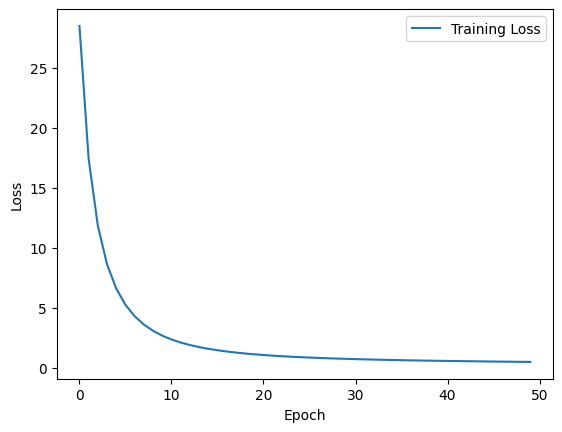

In [33]:
# Membuat grafik loss
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
_, top_k = torch.topk(mf_predictions, k=n_items)

for i in range(top_k.shape[0]):
  print((top_k[i][top_k[i] < n_items] + 1).tolist())

[13, 39, 17, 40, 9, 36, 5, 2, 8, 14, 3, 29, 1, 26, 4, 22, 15, 35, 28, 31, 24, 34, 21, 6, 33, 23, 19, 25, 27, 12, 11, 18, 20, 10, 30, 16, 38, 37, 32, 7]
[39, 40, 6, 22, 11, 36, 10, 32, 37, 20, 18, 13, 3, 15, 26, 1, 27, 25, 14, 19, 23, 29, 33, 5, 24, 4, 31, 21, 8, 28, 2, 7, 16, 38, 17, 35, 30, 34, 12, 9]
[37, 14, 17, 33, 25, 11, 20, 19, 5, 12, 10, 8, 29, 9, 26, 6, 31, 4, 21, 1, 24, 23, 7, 2, 28, 38, 3, 22, 36, 15, 32, 35, 27, 40, 30, 16, 34, 39, 18, 13]
[9, 10, 27, 38, 40, 32, 16, 26, 33, 14, 21, 18, 28, 4, 22, 39, 29, 25, 13, 20, 24, 37, 6, 15, 31, 8, 1, 12, 3, 19, 5, 36, 2, 34, 23, 35, 11, 17, 30, 7]
[37, 3, 32, 20, 10, 11, 7, 36, 15, 25, 12, 1, 23, 24, 29, 6, 33, 26, 39, 5, 13, 27, 31, 8, 4, 14, 22, 21, 28, 34, 2, 35, 17, 9, 19, 40, 18, 16, 38, 30]
[11, 12, 30, 10, 32, 18, 7, 19, 14, 6, 34, 16, 1, 2, 26, 27, 25, 33, 13, 35, 31, 20, 29, 15, 24, 22, 8, 39, 4, 21, 40, 17, 36, 5, 28, 23, 38, 37, 3, 9]
[4, 37, 20, 38, 16, 40, 22, 6, 12, 28, 26, 35, 19, 29, 25, 34, 23, 10, 31, 8, 1, 14, 27,

In [35]:
mf_predictions

tensor([[ 3.6264,  4.2747,  3.8902,  ..., -2.9817,  6.3905,  5.9108],
        [ 2.8402, -0.3672,  3.3733,  ..., -1.3635,  8.5972,  8.0414],
        [ 3.1848,  2.8859,  2.3599,  ...,  2.7322, -2.5988,  0.2498],
        ...,
        [ 5.2008,  8.0641,  1.4158,  ..., 12.1508, 13.1634,  3.3407],
        [ 3.6045,  2.2237,  6.6383,  ...,  7.2365,  8.3534,  0.1094],
        [ 4.9180,  8.5474,  6.8856,  ...,  0.9123,  0.0605,  0.0475]])

1, Nandya
Rekomendasi Gaya Rambut: ['Poni Curve', 'Blunt Cut Bob', 'Wavy High Volume', 'Wolf Cut', 'Short Straight']

In [36]:
# combined_predictions = (knn_predictions + mf_predictions) / 2

_, top_k = torch.topk(mf_predictions, k=n_items)

for i in range(top_k.shape[0]):
    recommended_hair_ids = (top_k[i][top_k[i] < n_items] + 1).tolist()
    user_gender = new_df.loc[new_df['id'] == i+1, 'gender'].values[0]
    recommended_hair_styles = []
    for hair_id in recommended_hair_ids:
        if (user_gender == 'Laki-laki' and hair_id <= 20) or (user_gender == 'Perempuan' and hair_id > 20):
            recommended_hair_styles.append(new_df.loc[new_df['hair_id'] == hair_id, 'hairstyle'].values[0])
            if len(recommended_hair_styles) == 5:
                break
    while len(recommended_hair_styles) < 5:
        # Mengambil item teratas yang sesuai dengan gender pengguna
        for hair_id in top_k[i]:
            if (user_gender == 'Laki-laki' and hair_id <= 20) or (user_gender == 'Perempuan' and hair_id > 20):
                if hair_id not in recommended_hair_ids:
                    recommended_hair_ids.append(hair_id)
                    recommended_hair_styles.append(new_df.loc[new_df['hair_id'] == hair_id, 'hairstyle'].values[0])
                    break
    user_name = new_df.loc[new_df['id'] == i+1, 'name'].values[0]
    print(f"{i+1}, {user_name}")
    print(f"Rekomendasi Gaya Rambut: {recommended_hair_styles}")

1, Annas Agung Cahyo Murti Utomo
Rekomendasi Gaya Rambut: ['Low Fade', 'High Fade', 'Mullet', 'Pompadour', 'Buzz Cut']
2, Dicky Surya Nanda 
Rekomendasi Gaya Rambut: ['Side Part', 'Curtain', 'Two Blocks', 'Quiff', 'French Crop']
3, Danedo Rayhan Haq
Rekomendasi Gaya Rambut: ['Mohawk', 'High Fade', 'Curtain', 'Quiff', 'Faux Hawk']
4, Obyarta Neo Omandi
Rekomendasi Gaya Rambut: ['Mullet', 'Two Blocks', 'Blunt Crop', 'Mohawk', 'French Crop']
5, Guntur febri
Rekomendasi Gaya Rambut: ['Taper Fade', 'Quiff', 'Two Blocks', 'Curtain', 'Slick-back']
6, Moh Rikzan Wagianto 
Rekomendasi Gaya Rambut: ['Curtain', 'Man Bun/Top Knot', 'Two Blocks', 'French Crop', 'Slick-back']
7, Satya Agni
Rekomendasi Gaya Rambut: ['Crew Cut', 'Quiff', 'Blunt Crop', 'Side Part', 'Man Bun/Top Knot']
8, Hardi Yudhistira
Rekomendasi Gaya Rambut: ['Mohawk', 'Low Fade', 'Quiff', 'Mullet', 'Crew Cut']
9, Luqmannul Hakim Angger Santoso 
Rekomendasi Gaya Rambut: ['Slick-back', 'Taper Fade', 'French Crop', 'Caesar Cut', 'Hig

In [37]:
# # memprediksi rating untuk data test menggunakan matrix factorization
mf_test_predictions = torch.zeros((n_users, n_items)) #membuat matrix baru dan mengisikan rating sesuai dengan model yang telah dilatih
for i in range(n_users):
    mf_test_predictions[i] = mf_model(torch.tensor([i]*n_items), torch.arange(n_items)).detach()

In [38]:
with torch.no_grad():
    for user_idx, item_idx, rating in test_loader:
        # Convert indices to Long data type
        user_idx = user_idx.long()
        item_idx = item_idx.long()
        predictions = mf_model(user_idx, item_idx)

        # Calculate MSE and MAE for each batch
        batch_mse = mean_squared_error(rating.float().numpy(), predictions.numpy())
        batch_mae = mean_absolute_error(rating.float().numpy(), predictions.numpy())
        test_samples = len(user_idx)

        # Accumulate total MSE and MAE on the entire test data
        test_mse = batch_mse * len(user_idx)
        test_mae = batch_mae * len(user_idx)

# Calculate the average MSE and MAE on the test data
test_mse /= test_samples
test_mae /= test_samples

# Print evaluation metrics on the test data
print(f"Test MSE: {test_mse}, Test MAE: {test_mae}")

Test MSE: 0.15645000338554382, Test MAE: 0.3955376148223877


In [39]:
mf_test_predictions

tensor([[ 3.6264,  4.2747,  3.8902,  ..., -2.9817,  6.3905,  5.9108],
        [ 2.8402, -0.3672,  3.3733,  ..., -1.3635,  8.5972,  8.0414],
        [ 3.1848,  2.8859,  2.3599,  ...,  2.7322, -2.5988,  0.2498],
        ...,
        [ 5.2008,  8.0641,  1.4158,  ..., 12.1508, 13.1634,  3.3407],
        [ 3.6045,  2.2237,  6.6383,  ...,  7.2365,  8.3534,  0.1094],
        [ 4.9180,  8.5474,  6.8856,  ...,  0.9123,  0.0605,  0.0475]])

In [41]:
# combined_predictions = (knn_predictions + mf_predictions) / 2

_, top_k = torch.topk(mf_test_predictions, k=n_items)

for i in range(top_k.shape[0]):
    recommended_hair_ids = (top_k[i][top_k[i] < n_items] + 1).tolist()
    user_gender = new_df.loc[new_df['id'] == i+1, 'gender'].values[0]
    recommended_hair_styles = []
    for hair_id in recommended_hair_ids:
        if (user_gender == 'Laki-laki' and hair_id <= 20) or (user_gender == 'Perempuan' and hair_id > 20):
            recommended_hair_styles.append(new_df.loc[new_df['hair_id'] == hair_id, 'hairstyle'].values[0])
            if len(recommended_hair_styles) == 5:
                break
    while len(recommended_hair_styles) < 5:
        # Mengambil item teratas yang sesuai dengan gender pengguna
        for hair_id in top_k[i]:
            if (user_gender == 'Laki-laki' and hair_id <= 20) or (user_gender == 'Perempuan' and hair_id > 20):
                if hair_id not in recommended_hair_ids:
                    recommended_hair_ids.append(hair_id)
                    recommended_hair_styles.append(new_df.loc[new_df['hair_id'] == hair_id, 'hairstyle'].values[0])
                    break
    user_name = new_df.loc[new_df['id'] == i+1, 'name'].values[0]
    print(f"{i+1}, {user_name}")
    print(f"Rekomendasi Gaya Rambut: {recommended_hair_styles}")

1, Annas Agung Cahyo Murti Utomo
Rekomendasi Gaya Rambut: ['Low Fade', 'High Fade', 'Mullet', 'Pompadour', 'Buzz Cut']
2, Dicky Surya Nanda 
Rekomendasi Gaya Rambut: ['Side Part', 'Curtain', 'Two Blocks', 'Quiff', 'French Crop']
3, Danedo Rayhan Haq
Rekomendasi Gaya Rambut: ['Mohawk', 'High Fade', 'Curtain', 'Quiff', 'Faux Hawk']
4, Obyarta Neo Omandi
Rekomendasi Gaya Rambut: ['Mullet', 'Two Blocks', 'Blunt Crop', 'Mohawk', 'French Crop']
5, Guntur febri
Rekomendasi Gaya Rambut: ['Taper Fade', 'Quiff', 'Two Blocks', 'Curtain', 'Slick-back']
6, Moh Rikzan Wagianto 
Rekomendasi Gaya Rambut: ['Curtain', 'Man Bun/Top Knot', 'Two Blocks', 'French Crop', 'Slick-back']
7, Satya Agni
Rekomendasi Gaya Rambut: ['Crew Cut', 'Quiff', 'Blunt Crop', 'Side Part', 'Man Bun/Top Knot']
8, Hardi Yudhistira
Rekomendasi Gaya Rambut: ['Mohawk', 'Low Fade', 'Quiff', 'Mullet', 'Crew Cut']
9, Luqmannul Hakim Angger Santoso 
Rekomendasi Gaya Rambut: ['Slick-back', 'Taper Fade', 'French Crop', 'Caesar Cut', 'Hig

In [47]:
id_value = 1
hair_id_value = 2

# Mencari indeks di test_data yang sesuai dengan id dan hair_id yang diberikan
test_indices = (new_df["id"] == id_value) & (new_df["hair_id"] == hair_id_value)
# Mengambil rating pada test_data yang sesuai dengan indeks yang ditemukan
test_rating = new_df[test_indices]["rating"].values[0]
print(f"Rating pada test_data untuk id={id_value} dan hair_id={hair_id_value}: {test_rating}")

# Mengambil rating prediksi dari mf_predictions untuk id dan hair_id yang diberikan
mf_rating = mf_test_predictions[id_value-1, hair_id_value-1]
print(f"Rating prediksi dari mf_predictions untuk id={id_value} dan hair_id={hair_id_value}: {mf_rating}")

Rating pada test_data untuk id=1 dan hair_id=2: 4.0
Rating prediksi dari mf_predictions untuk id=1 dan hair_id=2: 4.274697303771973
